# Regresión Lineal

Tomado del Capitulo 3 del Libro [An Introduction to Statistical Learning with Applications in R](http://www-bcf.usc.edu/~gareth/ISL/)

La regresión lineal es una herramienta útil para predecir una variable respuesta cuantitativa. Pertenece a la clase de los métodos de aprendizaje estadístico supervisado.

- A pesar de que esta técnica puede parecer algo sencilla en comparación con algunos de los métodos de aprendizaje estadístico más modernos, la regresión lineal sigue siendo un método de aprendizaje estadístico útil y ampliamente utilizado.

- Además, sirve como un buen punto de partida para los enfoques más recientes, pues muchas de las técnicas de aprendizaje estadístico sofisticado pueden ser vistas como generalizaciones o extensiones de la regresión lineal.

- En consecuencia, no se puede subestimar la importancia de tener una buena comprensión de la regresión lineal antes de estudiar métodos de aprendizaje más complejos.



**Por que estamos aprediendo la regresión lineal?**

- Ampliamente usada
- Es efeciente, se ejecuta rápido
- Facil de utilizar (no requiere mucha afinación)
- Altamente interpretable
- Es la base de muchos otros metodos


## Librerias

Para **propositos del aprendizaje** se utilizarán varias librerías clásicas en los diferentes temas, para el caso de la estadística utilizaremos [Statsmodels](http://statsmodels.sourceforge.net/) y [Scikit-learn](http://scikit-learn.org/stable/). Es recomendable utilizar mas a menudo esta última librería la cual tiene muchas bondades frente al aprendizaje automático que veremos mas adelante.


Para entrar en materia e ilustrar un poco de forma rápida tomaremos unos datos de un ejemplo simple. 

### Datos de Publicidad

Supongamos que somos consultores estadísticos contratados por un cliente que necesita asesoría en cómo mejorar las ventas de un producto en particular. Para esto se cuenta con un conjunto de datos, llamado **Publicidad**, el cual contiene las ventas del producto en 200 mercados diferentes, junto con los presupuestos de publicidad (en miles de dólares) para el producto en cada uno de los mercados para tres medios diferentes: **TV, Radio y Periódico**.


In [3]:
# Importamos las librearias necesarias para manipular los datos
import pandas as pd # Librería que permite alamacenar los datos en tablas o dataframes como en R
import matplotlib.pyplot as plt # Librería para graficar

# Esta línea permite que aparezcan los graficos directamente en el notebook
%matplotlib inline

In [4]:
# Leemos los datos de un archivo en formato CSV y lo almacenamos en un DataFrame de la librearía Pandas
# El archivo puede ser leido directamente de un URL en internet o localmente una vez sea descargado.
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head() # Lista los primeros datos de la tabla o dataframe

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


** Cuales son los atributos? **
- **TV**: Gastos en publicidad televisiva (en miles de dolares)
- **Radio**: Gastos en publicidad de Radio
- **Newspaper**: Gastos en publicidad en periódicos

** Cual es la respuesta?**
- **Sales**: ventas de un solo producto en un mercado dado (en miles de unidades)

In [5]:
# Para conocer el numero de observaciones y variables de nuestros datos
data.shape

(200, 4)

Hay 200 observaciones, como mercados en el conjunto de datos, con 4 variables (una dependiente y 3 independientes).

In [6]:
# Visualizar el tipo de dato almacenado en cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


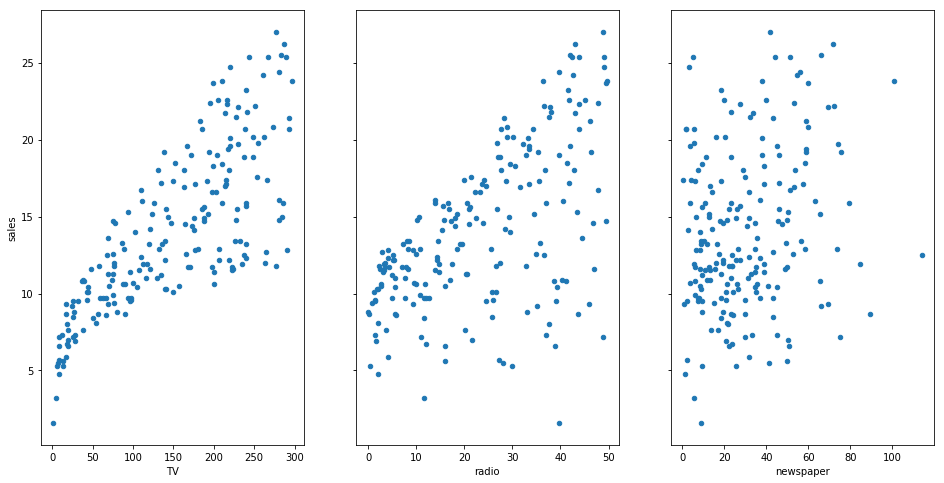

In [7]:
# Visualizamos la relación entre las variables o atributos y la respuesta utilizando un gráfico de dispersión
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

##### Para visualizar esta misma gráfica en R
``` R
publicidad = read.csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", header=TRUE, sep="," , dec=".")
names(publicidad)
# dim(publicidad)
# View(publicidad)
attach(publicidad)
old.par <- par(mfrow=c(1, 3))
plot(TV,sales, main="Ventas por TV", col="red"); reg1 = lm(sales~TV); abline(reg1, col="blue", lwd=3)
plot(radio,sales, main="Ventas por Radio", col="red"); reg2 = lm(sales~radio); abline(reg2, col="blue", lwd=3)
plot(newspaper,sales, main="Ventas por Periódico", col="red"); reg3 = lm(sales~newspaper); abline(reg3, col="blue", lwd=3)
# Restauramos la salida
par(old.par)
```

A nuestro cliente no le es posible aumentar directamente las ventas del producto, y necesita hacer publicidad. Por otro lado, el cliente puede controlar el gasto publicitario en cada uno de los tres medios. Por lo tanto, si determinamos que hay una asociación entre la publicidad y las ventas, entonces podemos aconsejar a nuestro cliente cómo debe ajustar los presupuestos en publicidad, de manera que indirectamente se aumenten las ventas. En otras palabras, nuestro objetivo es desarrollar un modelo preciso que pueda ser usado para predecir las ventas sobre la base de los gastos en los tres medios publicitarios.

Supongamos que en nuestro papel de consultores estadísticos se nos pide que sugiramos, sobre la base de estos datos, un plan de mercadeo (marketing) para el próximo año, que produzca una venta alta del producto.

**¿Qué información sería útil para proporcionar tal recomendación?** 

Aquí hay algunas preguntas importantes que podríamos tratar de abordar:

1. _**¿Existe una relación entre el presupuesto de publicidad y las ventas?**_

Nuestro primer objetivo debe ser determinar si los datos proporcionan evidencia de una asociación entre el gasto publicitario y las ventas. Si la evidencia es débil, entonces se podría argumentar que no se debe gastar dinero en publicidad.

2. _**¿Qué tan fuerte es la relación entre el presupuesto publicitario y las ventas?**_

Asumiendo que hay una relación entre la publicidad y las ventas, nos gustaría saber la fuerza de esta relación. En otras palabras, dado un cierto presupuesto publicitario, ¿podemos predecir las ventas con un alto nivel de precisión? Esta sería una relación fuerte. ¿O es una predicción de las ventas basadas en gastos de publicidad sólo un poco mejor que una suposición al azar? Esta sería una relación débil.

3. _**¿Qué medios de publicidad contribuyen a las ventas?**_

¿Los tres medios de comunicación -TV, radio y periódico- contribuyen a las ventas, o sólo uno o dos de los medios contribuyen? Para responder a esta pregunta, debemos encontrar una manera de separar los efectos individuales de cada medio sobre las ventas cuando hemos gastado dinero en los tres medios.

4. _**¿Con qué precisión podemos estimar el efecto de cada medio de publicidad sobre las ventas?**_

Por cada dólar gastado en publicidad en un medio en particular, ¿en qué cantidad aumentará el volumen de ventas? ¿Con qué precisión podemos predecir esta cantidad de aumento?

5. _**¿Con qué precisión podemos predecir las ventas futuras?**_

Para cualquier nivel de publicidad en televisión, radio o periódico, ¿cuál es nuestra predicción de ventas y cuál es la precisión de esta predicción?

6. _**¿Es la relación lineal?**_

Si existe aproximadamente una relación lineal entre el gasto publicitario en los diversos medios y las ventas, la regresión lineal es una herramienta apropiada. Si no es así, puede ser posible transformar el predictor o la respuesta de forma tal que puedan usarse los procedimientos de la regresión lineal.

7. _**¿Hay sinergia entre los medios publicitarios?**_

Tal vez un gasto de 50,000 en publicidad televisiva y 50,000 en publicidad en la radio produce más ventas que la asignación de 100,000 a la televisión o la radio individualmente. En marketing, esto se conoce como un efecto de sinergia, mientras que en estadística se llama efecto de interacción.

** La regresión lineal puede ser utilizada para responder cada una de estas preguntas.**


## Regresión Lineal Simple

La regresión lineal simple trata de predecir una **respuesta** cuantitativa Y (o variable dependiente cuantitativa) sobre la base de una única variable **predictora** X (o variable independiente). Supone que hay aproximadamente una relación lineal entre X e Y. Matemáticamente, podemos escribir esta relación lineal como

Ecuación (1.1)<br><br>
$Y ≈ \beta_0 + \beta_1X$

Que representan estos terminos

- $Y$ es la respuesta<br>
- $X$ es el predictor<br>
- $\beta_0$ es el intercepto<br>
- $\beta_1$ el coeficiente para $X$<br>

En esta expresión “≈” se puede leer como "_es aproximadamente modelada como_".
También se dice que se está regresando a $Y$ sobre $X$.

Por ejemplo, $X$ puede representar el gasto de publicidad en TV e $Y$ puede representar las ventas. Entonces podemos regresar las ventas sobre TV ajustando el modelo

$$ventas ≈ \beta_0 + \beta_1TV$$

En la ecuación (1.1), $\beta_0$ y $\beta_1$ son dos constantes desconocidas que representan los términos de _intercepto_ y _pendiente_ en el modelo lineal. Juntos, $\beta_0$ y $\beta_1$ son llamados
_coeficientes_ del modelo o _parámetros_. Una vez que hemos utilizado nuestros datos de entrenamiento para producir estimaciones  $\hat\beta_0$ y $\hat\beta_1$ para los coeficientes del modelo, podemos predecir las ventas futuras sobre la base de un valor particular del gasto de publicidad en televisión, calculando

Ecuación (1.2)<br><br>
$$\hat Y ≈ \hat\beta_0 + \hat\beta_1X$$

donde $\hat Y$ indica una predicción de $Y$ sobre la base de $X=x$. Se usa el símbolo sombrero ˆ para denotar el valor estimado de un parámetro desconocido o coeficiente, o denotar el valor predicho de la respuesta.




### Estimando "aprendiendo" los Coeficientes

En la práctica, $\beta_0$ y $\beta_1$ son desconocidos. Así que antes de que podamos usar la Ec.(1.1) para hacer predicciones, debemos utilizar datos para estimar los coeficientes.

Suponga que $(x_1, y_1), (x_2, y_2),. . . , (x_n, y_n)$ representan n pares de observaciones, cada uno de los cuales consiste en una medición de $X$ y una medida de $Y$. En el ejemplo de Publicidad, este conjunto de datos consiste del presupuesto publicitario de TV y las ventas del producto para n = 200 diferentes mercados.

El objetivo es obtener estimaciones  $\hat\beta_0 + \hat\beta_1$ tales que el modelo Ec. (1.1) se ajuste bien a los datos disponibles, es decir, que $\hat y_i ≈ \hat\beta_0 + \hat\beta_1x_i$, para $i$=1,2,..., n. En otras palabras, queremos encontrar un intercepto $\hat\beta_0$ y una pendiente $\hat\beta_1$ tal que la recta resultante esté tan cerca como sea posible a los n=200 datos.

Hay muchas formas de medir _cercanía_. Sin embargo, el enfoque más común consiste en minimizar el criterio de los _**mínimos cuadrados**_.

Sea $\hat y_i ≈ \hat\beta_0 + \hat\beta_1x_i$ la predicción de Y basada en el i-ésimo valor de $X$.

Entonces $e_i = y_i - \hat y_i$ representa el i-ésimo _residual_, es decir la diferencia entre el valor de
la i-ésima respuesta observada y la predicción de ese valor que es hecha por el modelo lineal. Se define la _**suma de cuadrados residual (RSS)**_ como:

Ecuación (1.3) <br>

$$ RSS = e_1^2 + e_2^2 + ... + e_n^2$$

o equivalentemente,

$$ RSS = (y_i - \hat\beta_0 + \hat\beta_1x_1)^2 + (y_2 - \hat\beta_0 + \hat\beta_1x_2)^2 + ... + (y_n - \hat\beta_0 + \hat\beta_1x_n)^2$$

El enfoque de mínimos cuadrados elige $\hat\beta_0 y \hat\beta_1$ de forma tal que minimicen la RSS. Usando un poco de cálculo, el mínimo se obtiene en

Ecuación (1.4)<br>

$$\hat\beta_1 = \frac{ \sum_{i=1}^n (x_i - \bar x) (y_i - \bar y) }{ \sum_{i=1}^n (x_i - \bar x) ^2 } $$

$$\hat\beta_0 = \bar y - \hat\beta_1 \bar x$$

donde $\bar y = \frac{1}{n} \sum_{i=1}^n y_i $  y  $\bar x = \frac{1}{n} \sum_{i=1}^n x_i $  son las medias muestrales.

En otras palabras, La Ec.(1.4) definen las _estimaciones de mínimos cuadrados_ de los coeficientes del modelo de regresión lineal simple.


Ahora bien, utilizamos la librería o paquete **Statsmodels** para estimar los coeficientes del modelo para los datos de publicidad:

In [8]:
# Esta es una forma estandar de importar la librería si se quiere utilizar la notación similar que en R
import statsmodels.formula.api as smf

# Creamos el modelo y lo ajustamos en una sola línea de código
# OLS es la función de Ordinary Least Squeares por sus siglas en ingles del metodo de ajuste por minimos cuadrados 
lm = smf.ols(formula='sales ~ TV', data=data).fit()

# Visualizamos los coeficientes una vez ajustado el modelo
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

#### Interpretación de los resultados

- Un aumento en una unidad en gasto de publicidad en TV esta asociada con 0.047537 unidades de incremento en ventas.
- O mas claramente, de acuerdo a este modelo, un gasto adicional de 1000 en publicidad en TV está asociado a una venta de aproximadamente 47.5 unidades adicionales del producto.

Note que si un incremento en gastos de publicidad en TV fuera asociado con un decremento o reducción en las ventas, $\beta_1$ debería ser negativo.

La siguiente figura muestra el ajuste de mínimos cuadrados a los datos de publicidad, donde $ \beta_0=7.032594$ y $\beta_1=0.047537$.


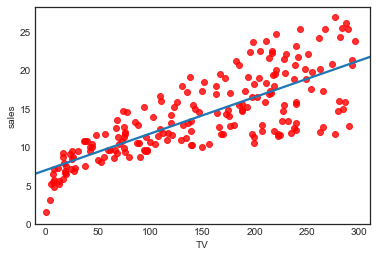

In [9]:
# Para visualizar rapidamente estos datos podemos hacer uso de otra librería para graficos muy potente llamada seaborn
import seaborn as sns
plt.style.use('seaborn-white')
sns.regplot(data.TV, data.sales, order=1, ci=None, scatter_kws={'color':'r'})
plt.xlim(-10,310)
plt.ylim(ymin=0);

Si queremos hacerlo con las librearias cargadas hasta el momento de _Statsmodels_ y _matplotlib_, debemos de calcular las prediciones para los valores máximos y mínimos de los datos para TV; y entonces utilizar los valores predichos para construir la gráfica o línea de minimos cuadrados. 


In [10]:
# Creamos un DataFrame con los valores máx y mín para los datos de TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head() # Visualizamos los valores

,TV
0,0.7
1,296.4


In [11]:
# hacemos predicciones para aquellos valores de x y los guardamos en la variable "preds"
preds = lm.predict(X_new)
preds

0     7.065869
1    21.122454
dtype: float64

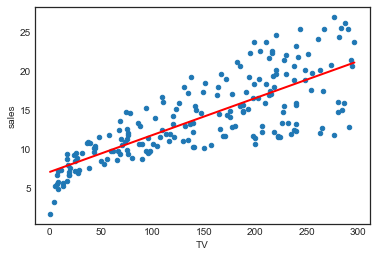

In [12]:
# Ahora gráficamos los valores datos observados
data.plot(kind='scatter', x='TV', y='sales')
# luego gráficamos la línea de mínimos cuadrados
plt.plot(X_new, preds, c='red', linewidth=2)

Para visualizar y gráficar estos mismos datos pero en R, sería algo como:

``` R
plot(TV,sales)
reg1 = lm(sales~TV)
abline(reg1, col="red")

```

Si desearamos ver los **coeficientes de regresión** o _suma de cuadrados residuales (RSS)_ más en detalle o como se muestra en el libro, podemos gráficar algo como:


### Lo mismo pero utiilizando Scikit-learn

In [13]:
# Para crear el modelo, usuamos la función de regresión lineal de la librería Scikit-learn
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
regr = skl_lm.LinearRegression() # Coeficientes de regresión (Método de mínimos cuadrados)

X = scale(data.TV, with_mean=True, with_std=False).reshape(-1,1) 
y = data.sales

regr.fit(X,y) # Ajustamos el modelo
print(regr.intercept_) 
print(regr.coef_)

14.0225
[ 0.04753664]


### Lo mismo pero utiilizando Scipy

Pendiente, intercepto: 0.047536640433 7.03259354913


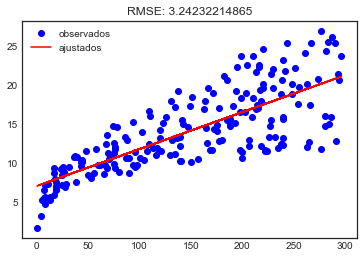

In [16]:
import numpy as np
from scipy.stats import linregress

x = data.TV #.values.reshape(-1,1) 
y = data.sales

slope, intercept, r_value, p_value, std_err = linregress(x, y)
yfit = slope * x + intercept
plt.figure()
plt.plot(x, y, 'bo', label='observados')
plt.plot(x, yfit, 'r', label='ajustados')
rmse = np.sqrt(np.sum((yfit - y) ** 2) / len(y))
plt.title('RMSE: '+str(rmse))
plt.legend(loc='best')
print('Pendiente, intercepto:', slope, intercept)

In [17]:
import numpy as np # Librería para manejo de matrices de forma eficiente
from mpl_toolkits.mplot3d import axes3d # paquete para graficar en 3 dimensiones

# Crear una malla de coordenadas para el gráfico
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calcular los valores de los residuales de Z basados en los coeficientes de la malla
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000

# Minimizar los residuales RSS de Z
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)/1000
min_rss

2.1025305831313514

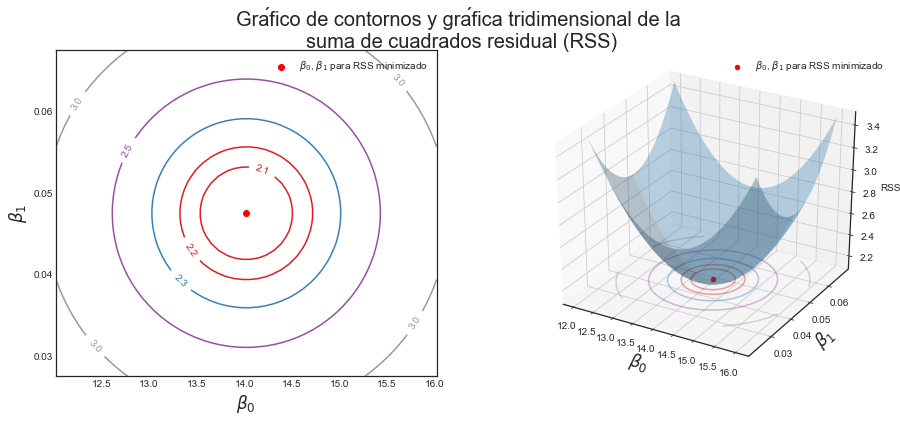

In [18]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('Gráfico de contornos y gráfica tridimensional de la \nsuma de cuadrados residual (RSS)', fontsize=20)
min_RSS = r'$\beta_0$, $\beta_1$ para RSS minimizado'

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

En la figura se calculó la RSS para varios valores de $\beta_0$ y $\beta_1$ usando los datos de publicidad, con las ventas como respuesta y TV como predictora. En cada gráfica el punto rojo es el par de estimaciones de mínimos cuadrados ( $\hat \beta_0$ , $\hat \beta_1$). Estos valores claramente minimizan la RSS.


Notar que el texto en el libro ISLR describe los coeficientes basados en datos no centralizados, mientras que el gráfico aquí generado muestra los datos centrados. Se puede notar que visualmente es mejor para explicar el concepto de un mínimo RSS. 

Con el fin de no confundir al lector, los valores en la axisa de los coeficientes de $\beta_0$ han cambiado con respecto al texto, pero las axisas en el gráfico estan sin alterar.


### Evaluación de la exactitud de las estimaciones de coeficientes

En aplicaciones reales, tenemos acceso a un conjunto de observaciones a partir de las cuales podemos calcular (estimar) la recta de mínimos cuadrados; sin embargo, la recta de _regresión de la población_ o recta verdadera no es posible observarla.

Para calcular los errores estándar asociados con  $\hat \beta_0$ y $\hat \beta_1$ , usamos las siguientes fórmulas:

$$ SE(\hat \beta_0)^2 = \sigma^2 [ \frac{1}{n} + \frac{\bar x^2}{ \sum_{i=1}^n (x_i - \bar x) ^2 }] $$

$$ SE(\hat \beta_1)^2 = \frac{\sigma^2}{ \sum_{i=1}^n (x_i - \bar x) ^2 } $$

Donde $\sigma^2 = Var(\epsilon)$. Para que estas fórmulas sean estrictamente válidas, debemos asumir que los errores $\epsilon_i$ para cada observación no están correlacionados y que tienen varianza común $\sigma^2$. Esto claramente no es cierto en muchos casos, pero la fórmula todavía resulta ser una buena aproximación.

- Observe en la fórmula que $SE(\hat \beta_1)$ es menor cuando los $x_i$ están más dispersos; intuitivamente tenemos más influencia (_leverage_) para estimar una pendiente cuando esto ocurre.

- También vemos que $SE(\hat \beta_0)$ sería el mismo $SE(\hat u)$ si $\bar x$ fuera cero (en cuyo caso $\hat \beta_0$ sería igual a $\bar y$ ).

- En general, $\sigma^2$ no se conoce, pero se puede estimar a partir de los datos. La estimación de $\sigma$ se conoce como el _error estándar residual (RSE)_ y está dada por la fórmula:

$$ RSE = \sqrt{ \frac{RSS}{n - 2} }$$

Estrictamente hablando, cuando $\sigma^2$ es estimado a partir de los datos debemos escribir $\hat SE (\hat \beta_1)$, para indicar que se ha hecho una estimación, pero por simplicidad en la notación no se usa este "sombrero" adicional.


Se pueden usar los errores estándar para calcular **intervalos de confianza**. Un intervalo de confianza del 95% se define como un rango de valores tal que con una probabilidad del 95%, el intervalo contendrá el verdadero valor desconocido del parámetro.

El rango se define en términos de los límites inferior y superior calculados a partir de la muestra de datos. Para la regresión lineal, el intervalo de confianza del 95% para $\beta_1$ toma aproximadamente la forma

$$ \hat \beta_1 \pm 2 * \hat SE (\hat \beta_1) $$

Es decir, hay aproximadamente un 95% de probabilidad de que el intervalo

$$ [ \hat \beta_1 - 2 * \hat SE (\hat \beta_1), \hat \beta_1 + 2 * \hat SE (\hat \beta_1) ] $$

contenga el verdadero valor de $\beta_1$. Similarmente, un intervalo de confianza para $\beta_0$ es de la forma

$$ \hat \beta_0 \pm 2 * \hat SE (\hat \beta_0) $$




In [19]:
# Otra forma de visualizar los resultados del ajuste, incluyendo los errores estándar e intervalos de confianza 
lm.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


En el caso de los datos de publicidad, el intervalo de confianza del 95% para $\beta_0$ es [6.130, 7.935] y el intervalo de confianza del 95% para $\beta_1$ es [0.042, 0.053].

Por lo tanto, podemos concluir que en ausencia de publicidad, las ventas en promedio, estarán entre 6,130 y 7,940 unidades. Además, por cada aumento de $1,000 en publicidad televisiva, habrá un aumento promedio en ventas de entre 42 y 53 unidades. Hay que recordar que las unidades estan en miles.

In [20]:
# Visualiza los intervalos de confianza para los coeficientes del modelo
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


Los errores estándar también se pueden utilizar para realizar pruebas de hipótesis sobre los coeficientes. La prueba de hipótesis más común consiste en probar la hipótesis nula:

$H_0$: No hay relación lineal entre $X$ e $Y$  versus la hipótesis alternativa  $H_a$: Hay alguna relación entre $X$ e $Y$.

Matemáticamente, esto corresponde a probar $H_0$: $\beta_1=0$ versus $H_a$: $\beta_1 \ne 0$, ya que si $\beta_1=0$ entonces el modelo se reduce a $Y = \beta_0 + \epsilon$, y $X$ no estará asociado linealmente con $Y$.

Para probar la hipótesis nula, necesitamos determinar si  $\hat \beta_1$, nuestra estimación para $\beta_1$, está lo suficientemente lejos de cero, de manera que podamos estar seguros de que $\beta_1$ no es cero._¿Qué tan lejos es lo suficientemente lejos?_ Esto por supuesto depende de la precisión de $\hat \beta_1$, es decir, depende de $SE(\hat \beta_1)$. Si $SE(\hat \beta_1)$ es pequeño, entonces incluso valores relativamente pequeños de $\hat \beta_1$ pueden proporcionar una fuerte evidencia de que $\beta_1 \neq 0$, y por lo tanto que existe una relación lineal entre $X$ e
$Y$.

Por el contrario, si $SE(\hat \beta_1)$ es grande, entonces $\hat \beta_1$ debe ser grande en valor absoluto para que podamos rechazar la hipótesis nula. En la práctica, se calcula un _**estadístico t**_, dado por:

$$ t = \frac{\hat \beta_1 - 0}{SE(\hat \beta_1)}$$

El cual mide el número de desviaciones estándar que $\hat \beta_1$ está lejos de 0. Si realmente no hay relación lineal entre $X$ e $Y$, y los _errores tienen distribución normal_, entonces esperamos que la anterior Ecuación tendrá una **distribución t con n-2 grados de libertad**. La _distribución t_ tiene una forma de campana y para valores de n mayores que aproximadamente 30, es bastante similar a la distribución normal. En consecuencia, es una cuestión simple calcular la probabilidad de observar cualquier valor igual a |t| o mayor, suponiendo $\hat \beta_1 = 0$; a esta probabilidad se le llama el _**p-valor**_. 

> A grandes rasgos, el _p-valor_ se interpreta de la siguiente manera: un pequeño p-valor indica que es poco probable que se observe una asociación tan sustancial entre el predictor y la respuesta debido al azar, en ausencia de una asociación lineal real entre el predictor y la respuesta.

Por lo tanto, si el _p-valor_ es pequeño, entonces se puede inferir que hay una asociación entre el predictor y la respuesta. Rechazamos la hipótesis nula, es decir, declaramos que existe una relación lineal entre $X$ e $Y$, si el _p-valor_ es lo suficientemente pequeño. Las cotas típicas del _p-valor_ para rechazar la hipótesis nula son 5% o 1%. Cuando n = 30, estos corresponden a estadísticos t de alrededor de 2 y 2.75, respectivamente.

La tabla del paso anterior al del cálculo de los intervalos de confianza, proporciona detalles del modelo de mínimos cuadrados para la regresión del número de unidades vendidas en el presupuesto de publicidad de TV para los datos de Publicidad. Obsérvese que los coeficientes estimados para $\beta_0$ y $\beta_1$ son muy grandes en relación con sus errores estándar, por lo que los estadísticos t también son grandes; las probabilidades de ver tales valores si $H_0$ es verdadera son virtualmente cero. Por lo tanto podemos concluir que $\beta_0 \ne 0$ y $\beta_1 \ne 0$.


In [21]:
# Obtener un resumen de los parametros utilizados y estimados por el modelo
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 22 Oct 2017   Prob (F-statistic):           1.47e-42
Time:                        09:25:33   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En la tabla o resultados anteriores, un pequeño p-valor para el intercepto indica que podemos rechazar la hipótesis nula de que $\beta_0 = 0$, y un pequeño p-valor para TV indica que podemos rechazar la hipótesis nula de que $\beta_1= 0$. El rechazo de la última hipótesis nula nos permite concluir que existe una relación líneal entre la televisión y las ventas. El rechazo de la primera nos permite concluir que en ausencia de gasto en TV, las ventas no son cero.

### Evaluación de la exactitud del modelo

Una vez que hemos rechazado la hipótesis nula a favor de la hipótesis alternativa, es natural querer cuantificar hasta qué punto el modelo se ajusta a los datos. La calidad de un ajuste de regresión lineal típicamente se evalúa usando dos cantidades relacionadas: el _error estándar residual (RSE)_ y el _estadístico $R^2$_.

#### Error Estándar Residual - RSE

Recordemos que en el modelo $Y = \beta_0 + \beta_1 X + \epsilon$; que asociado con cada observación hay un término de error $\epsilon$. Debido a la presencia de estos términos de error, aunque conociéramos la verdadera recta de regresión (es decir, incluso si se conocieran $\beta_0$ y $\beta_1$), no podríamos predecir perfectamente $Y$ a partir de $X$. El RSE es una estimación de la desviación estándar de $\epsilon$. En términos generales, _es la cantidad promedio en que la respuesta se desviará de la verdadera recta de regresión_. Se calcula utilizando la fórmula:

$$ RSE = \sqrt{ \frac{1}{n-2} RSS } = \sqrt{ \frac{1}{n-2} \sum_{i=1}^n (y_i - \hat y_i)^2 }$$
    

In [22]:
# Calculo u obtención del RSE para el modelo de ventas y TV
# RSS a partir de los coeficientes de la regresión
RSS = ((data.sales - (lm.params[0] + lm.params[1] * data.TV))**2).sum()
RSE = (RSS / (data.values.shape[0] - 2))**(1/2)
print("Suma de cuadrados residual (RSS): ",RSS)
print("Error estándar residual (RSE): ",RSE)

Suma de cuadrados residual (RSS):  2102.5305831313503
Error estándar residual (RSE):  3.258656368650462


In [37]:
# Otra forma de calcular el RSE utilizando la libraría numpy
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [36]:
yfit = lm.params[1] * data.TV + lm.params[0]
# y = data.sales
rmse = np.sqrt(np.sum((yfit - y) ** 2) / len(y))
print("Error estándar residual (RSE): ",rmse)

Error estándar residual (RSE):  3.24232214865


En el caso de los datos de publicidad, vemos que el RSE es 3.26; en otras palabras, las ventas reales en cada mercado se desvían de la verdadera recta de regresión en aproximadamente 3,260 unidades, en promedio. Otra forma de interpretar es que incluso si el modelo fuera correcto y los verdaderos valores de los coeficientes desconocidos $\beta_0$ y $\beta_1$) fueran conocidos con exactitud, cualquier predicción de las ventas sobre la base de la publicidad televisiva seguiría estando alejado en unas 3,260 unidades en promedio. Por supuesto, si las 3,260 unidades son un error de predicción aceptable depende del contexto del problema. En el conjunto de datos de publicidad, el valor medio de las ventas en todos los mercados es de aproximadamente 14,000 unidades, por lo que el porcentaje de error es de 3,260 / 14,000 = 23%

El RSE se considera una medida de la falta de ajuste del modelo $Y = \beta_0 + \beta_1 X + \epsilon$ a los datos. Si las predicciones obtenidas utilizando el modelo son muy cercanas a los verdaderos valores de resultado, es decir, si $\hat y_i ≈ y_i$ para i = 1,. . . , n, entonces el RSE será pequeño, y podemos concluir que el modelo se ajusta muy bien a los datos. Por otro lado, si $\hat y_i$  está muy lejos de $y_i$ para una o más observaciones, entonces el RSE puede ser muy grande, lo que indica que el modelo no se ajusta bien a los datos.


### Estadístico $R^2$

El RSE proporciona una medida absoluta de la falta de ajuste del modelo anterior a los datos. Pero como se mide en las unidades de $Y$, no siempre queda claro qué constituye un buen RSE. El estadístico $R^2$ proporciona una medida alternativa de ajuste. Toma la forma de una proporción, la proporción de la varianza explicada, y toma siempre un valor entre 0 y 1 ( si el modelo tiene intercepto), y es independiente de la escala de $Y$. Para calcular $R^2$, utilizamos la fórmula:

$$ R^2 = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS} $$

donde $ TSS = \sum_{i=1}^n (y_i - \bar y)^2 $ es la suma de cuadrados total y RSS fue definida anteriormente.

TSS mide la variación total en la respuesta $Y$, y puede ser pensada como la cantidad de la variabilidad inherente en la respuesta antes de que se realice la regresión. Por el contrario, RSS mide la cantidad de variabilidad que se deja sin explicación después de realizar la regresión. Por tanto, TSS-RSS mide la cantidad de variabilidad en la respuesta que se explica (o se elimina) realizando la regresión, y $R^2$ mide la proporción de variabilidad en $Y$ que se puede explicar usando $X$. Un estadístico $R^2$ cercano a 1 indica que una gran proporción de la variabilidad en la respuesta ha sido explicada por la regresión. Un número cercano a 0 indica que la regresión no explicó gran parte de la variabilidad en la respuesta; esto puede ocurrir porque el modelo lineal es incorrecto, o el error inherente $\sigma^2$ es alto, o ambos.

En los resultados anteriores, el $R^2$ fue de 0.612, por lo que apenas, menos de dos tercios de la variabilidad en las ventas se explica por una regresión lineal sobre TV.

> El estadístico $R^2$ tiene una ventaja interpretativa sobre el RSE, ya que a diferencia del RSE, siempre está entre 0 y 1. Sin embargo, aún puede ser un reto determinar qué es un buen valor $R^2$, y en general, esto dependerá de la aplicación. Por ejemplo, en ciertos problemas de la física, se puede conocer que los datos realmente provienen de un modelo lineal con un pequeño error residual. En este caso, esperamos ver un valor de $R^2$ que es extremadamente cercano a 1, y un valor $R^2$ sustancialmente más pequeño podría indicar un problema serio con el experimento por medio del cual se generaron los datos. Por otra parte, en aplicaciones típicas en biología, psicología, marketing y otras áreas, el modelo lineal utilizado es en el mejor de los casos una aproximación extremadamente burda a los datos, y los errores residuales debidos a otros factores no medidos son a menudo muy grandes. En este contexto, se espera que sólo una proporción muy pequeña de la varianza en la respuesta se explica por el predictor, y un valor $R^2$ pequeño (por debajo de 0.1) podría ser más realista!


El estadístico $R^2$ es una medida de la relación lineal entre $X$ e $Y$. Recuerde que la _correlación_ (muestral), definida como: 

$$ Corr(X,Y) = \frac{ \sum_{i=1}^n (x_i - \bar x)(y_i - \bar y) }{ \sqrt{ \sum_{i=1}^n (x_i - \bar x)^2 } \sqrt{\sum_{i=1}^n (y_i - \bar y)^2 } } $$

es también una medida de la relación lineal entre $X$ e $Y$. Esto sugiere que se podría usar r=Cor(X, Y) en lugar de $R^2$ para evaluar el ajuste del modelo lineal. De hecho, se puede demostrar que en el ajuste de regresión lineal simple, $R^2$ = $r^2$. En otras palabras, la correlación cuadrática y el estadístico $R^2$ son idénticos. Sin embargo, en la siguiente sección se discutirá el problema de regresión lineal múltiple, en la cual se usan varios predictores simultáneamente para predecir la respuesta. El concepto de correlación entre los predictores y la respuesta no se extiende automáticamente a este ajuste, ya que la correlación cuantifica la asociación lineal entre un solo par de variables y no tiene en cuenta un mayor número de variables. Veremos que $R^2$ cumple con este papel.



In [24]:
# Estimación de los parametros utilizando Scikit-learn
regr2 = skl_lm.LinearRegression() # llama la funcion de regresion lineal

# feature_cols = ['TV', 'Radio', 'Newspaper']
# X = data[feature_cols]
# y = data["sales]

X = data.TV.values.reshape(-1,1)
y = data.sales

regr2.fit(X,y) # Ajustar el modelo
print("Intercepto: ", regr.intercept_)
print("Pendiente:", regr.coef_)

Sales_pred = regr2.predict(X)
print("R2: ",r2_score(y, Sales_pred))

Intercepto:  14.0225
Pendiente: [ 0.04753664]
R2:  0.61187505085


### Confianza en nuestro modelo

** ¿Es la regresión lineal un modelo de alto sesgo y baja varianza o un modelo de bajo sesgo y alta varianza?**

**El modelo es de alto sesgo y baja varianza**: Bajo varias repeticiones, la línea permanece casi en el mismo lugar (baja varianza), pero el promedio de estos modelos no harán un buen trabajo representando la curva real (alto sesgo). Note que la baja varianza es una característica útil cuando no se tienen muchos datos de entrenamiento.

Un concepto relacionado con esto son los intervalos de confianza. Statsmodels o cualquier librearía de las que estamos utilizando cálcula el 95% de intervalos de confianza para las coeficientes de nuestro modelo, los cuales son interpretados asi:

- Si la población para la cual estos datos de prueba fueron modelados 100 veces, aproximadamente 95 de los intervalos de confianza deberian contener el "verdadero" coeficiente.

- Tenga en cuenta que nosotros solamente tenemos una sola muestra, y no los datos de la población entera. El valor "verdadero" del coeficiente estará dentro de este intervalo, o quizas no, pero no hay forma de saberlo. Nosotros podemos estimar los coeficientes con los datos que nosotros tenemos, y mostrar la incertitumbre acerca de aquellas estimaciones dando un rango para los cuales nuestros coeficientes problablemente estarán.

- Note que usando el 95% de intevalo de confianza es simplemente una convención. Se pueden crear intervalos de confianza del 90% (que serán mas ajustados), o un 99% de intervalo de confianza (que será mas amplio), o cualqueir intervalo que se desee de acuerdo a los datos.


[< Inicio](Aprendizaje%20Estadistico%20y%20Automatico%20con%20Python.ipynb) | [Regresión Lineal Múltiple >](Regresion%20Lineal%20Multiple.ipynb)

Información de soporte adicional en Ingles.

- [Slides de Presentación en PDF](https://lagunita.stanford.edu/c4x/HumanitiesScience/StatLearning/asset/linear_regression.pdf)
- [Simple Linear Regression and Confidence Intervals](https://www.youtube.com/watch?v=PsE9UqoWtS4) (Video - duración 13:01)